##  Import Required Libraries 

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway
import dash
from dash import dcc, html,Input, Output
import plotly.express as px
from jupyter_dash import JupyterDash
import pygwalker as pyg 


## read data 

In [54]:
manufactring = pd.read_excel(r"E:\ziad\for tableau.xlsx",sheet_name='manufacturing')

In [55]:
downtime = pd.read_excel(r"E:\ziad\for tableau.xlsx",sheet_name='downtime')

In [56]:
operator = pd.read_excel(r"E:\ziad\for tableau.xlsx",sheet_name='operator')

In [57]:
batch_time = pd.read_excel(r"E:\ziad\for tableau.xlsx",sheet_name='batch_time')

##  Merge Datasets 

In [58]:
df1 = pd.merge(manufactring, operator, on='operator id', how='left')



In [59]:
df2 = pd.merge(df1, downtime, on='Batch', how='left')

In [60]:

df = pd.merge(df2, batch_time[['Size','Product','Flavor']], on='Product', how='left')

##  Summarize Data


In [24]:
df.head(10)

,Date,Product,Batch,Duration (m),Duration(h),shift,operator_id,operator,Emergency stop,Batch change,...,Label switch,Other,operator error,total(m),total(h),OPERATOR(H),NON OPERATOR (H),non operator error,Size,Flavor
0,2024-01-01,Diet Cola,42000,43,0.716667,morning,1003,Dennis,0,1,...,0,1,5,11,0.183333,0.083333,0.100000,6,600 ml,Diet Cola
1,2024-01-01,Root Berry,42001,44,0.733333,night,1001,Mac,1,0,...,2,0,3,5,0.083333,0.050000,0.033333,2,600 ml,Root Berry
2,2024-01-01,Orange,42002,43,0.716667,morning,1004,Charlie,1,2,...,0,0,3,7,0.116667,0.050000,0.066667,4,600 ml,Orange
3,2024-01-01,Cola,42003,42,0.700000,evening,1007,David,1,0,...,2,2,8,15,0.250000,0.133333,0.116667,7,600 ml,Cola
4,2024-01-01,Lemon Lime,42004,38,0.633333,evening,1008,Sarah,1,2,...,0,0,6,12,0.200000,0.100000,0.100000,6,600 ml,Lemon Lime
5,2024-01-01,Orange,42005,44,0.733333,evening,1009,John,0,1,...,1,2,6,12,0.200000,0.100000,0.100000,6,600 ml,Orange
6,2024-01-01,Root Berry,42006,44,0.733333,morning,1006,Emily,1,0,...,1,0,5,11,0.183333,0.083333,0.100000,6,600 ml,Root Berry
7,2024-01-01,Cola_2L,42007,69,1.150000,evening,1007,David,0,0,...,2,0,8,12,0.200000,0.133333,0.066667,4,2 L,Cola
8,2024-01-01,Orange,42008,42,0.700000,night,1002,Dee,2,0,...,1,2,2,12,0.200000,0.033333,0.166667,10,600 ml,Orange
9,2024-01-01,Cola_2L,42009,73,1.216667,morning,1003,Dennis,0,2,...,2,0,8,11,0.183333,0.133333,0.050000,3,2 L,Cola


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                10000 non-null  datetime64[ns]
 1   Product             10000 non-null  object        
 2   Batch               10000 non-null  int64         
 3   Duration (m)        10000 non-null  int64         
 4   Duration(h)         10000 non-null  float64       
 5   shift               10000 non-null  object        
 6   operator_id         10000 non-null  int64         
 7   operator            10000 non-null  object        
 8   Emergency stop      10000 non-null  int64         
 9   Batch change        10000 non-null  int64         
 10  Labeling error      10000 non-null  int64         
 11  Inventory shortage  10000 non-null  int64         
 12  Product spill       10000 non-null  int64         
 13  Machine adjustment  10000 non-null  int64      

In [13]:
df.describe()

,Date,Batch,Duration (m),Duration(h),operator_id,Emergency stop,Batch change,Labeling error,Inventory shortage,Product spill,...,Conveyor belt jam,Calibration error,Label switch,Other,operator error,total(m),total(h),OPERATOR(H),NON OPERATOR (H),non operator error
count,10000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2024-07-01 21:32:06.720000,46999.50000,45.363700,0.756062,1004.974900,1.012300,0.988400,0.991300,1.005500,1.010300,...,0.98950,1.005100,1.006800,0.995600,6.007300,12.000500,0.200008,0.100122,0.099887,5.993200
min,2024-01-01 00:00:00,42000.00000,35.000000,0.583333,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.033333,0.000000,0.000000,0.000000
25%,2024-04-01 00:00:00,44499.75000,38.000000,0.633333,1003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,5.000000,10.000000,0.166667,0.083333,0.083333,5.000000
50%,2024-07-03 00:00:00,46999.50000,41.000000,0.683333,1005.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,6.000000,12.000000,0.200000,0.100000,0.100000,6.000000
75%,2024-10-03 00:00:00,49499.25000,44.000000,0.733333,1007.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.000000,7.000000,14.000000,0.233333,0.116667,0.116667,7.000000
max,2024-12-31 00:00:00,51999.00000,80.000000,1.333333,1009.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.000000,12.000000,22.000000,0.366667,0.200000,0.200000,12.000000
std,NaN,2886.89568,12.536385,0.208940,2.588965,0.816955,0.815556,0.814058,0.819229,0.815022,...,0.81698,0.814457,0.812293,0.812309,1.991292,2.827419,0.047124,0.033188,0.033264,1.995834


## preprocessing 

### 1.1explore data 

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                10000 non-null  datetime64[ns]
 1   Product             10000 non-null  object        
 2   Batch               10000 non-null  int64         
 3   Duration (m)        10000 non-null  int64         
 4   Duration(h)         10000 non-null  float64       
 5   shift               10000 non-null  object        
 6   operator_id         10000 non-null  object        
 7   operator            10000 non-null  object        
 8   Emergency stop      10000 non-null  int64         
 9   Batch change        10000 non-null  int64         
 10  Labeling error      10000 non-null  int64         
 11  Inventory shortage  10000 non-null  int64         
 12  Product spill       10000 non-null  int64         
 13  Machine adjustment  10000 non-null  int64      

In [61]:
df.rename(columns={
    'operator id_x': 'operator_id',
    'shift_x': 'shift'
}, inplace=True)


In [62]:
df = df.loc[:, ~df.columns.str.startswith('Unnamed')]
df.drop(['shift_y', 'operator id_y', 'product'], axis=1, inplace=True)


In [63]:
df['operator_id'] = df['operator_id'].astype(str)

In [64]:
df.dtypes


Date                  datetime64[ns]
Product                       object
Batch                          int64
Duration (m)                   int64
Duration(h)                  float64
shift                         object
operator_id                   object
operator                      object
Emergency stop                 int64
Batch change                   int64
Labeling error                 int64
Inventory shortage             int64
Product spill                  int64
Machine adjustment             int64
Machine failure                int64
Batch coding error             int64
Conveyor belt jam              int64
Calibration error              int64
Label switch                   int64
Other                          int64
operator error                 int64
total(m)                       int64
total(h)                     float64
OPERATOR(H)                  float64
NON OPERATOR (H)             float64
non operator error             int64
Size                          object
F

In [13]:
df.isnull().sum()


Date                  0
Product               0
Batch                 0
Duration (m)          0
Duration(h)           0
shift                 0
operator_id           0
operator              0
Emergency stop        0
Batch change          0
Labeling error        0
Inventory shortage    0
Product spill         0
Machine adjustment    0
Machine failure       0
Batch coding error    0
Conveyor belt jam     0
Calibration error     0
Label switch          0
Other                 0
operator error        0
total(m)              0
total(h)              0
OPERATOR(H)           0
NON OPERATOR (H)      0
non operator error    0
Size                  0
Flavor                0
dtype: int64

### 1.2check outliers 


In [19]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)


Index(['Duration (m)', 'Duration(h)', 'Emergency stop', 'Batch change',
       'Labeling error', 'Inventory shortage', 'Product spill',
       'Machine adjustment', 'Machine failure', 'Batch coding error',
       'Conveyor belt jam', 'Calibration error', 'Label switch', 'Other',
       'operator error', 'total(m)', 'total(h)', 'OPERATOR(H)',
       'NON OPERATOR (H)', 'non operator error'],
      dtype='object')


In [20]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}:  = {outliers.shape[0]}")


Duration (m):  = 1641
Duration(h):  = 1641
Emergency stop:  = 0
Batch change:  = 0
Labeling error:  = 0
Inventory shortage:  = 0
Product spill:  = 0
Machine adjustment:  = 0
Machine failure:  = 0
Batch coding error:  = 0
Conveyor belt jam:  = 0
Calibration error:  = 0
Label switch:  = 0
Other:  = 0
operator error:  = 207
total(m):  = 19
total(h):  = 59
OPERATOR(H):  = 207
NON OPERATOR (H):  = 191
non operator error:  = 191


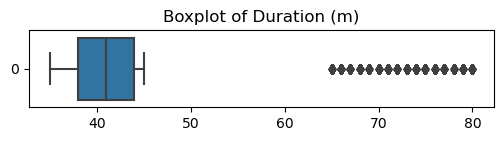

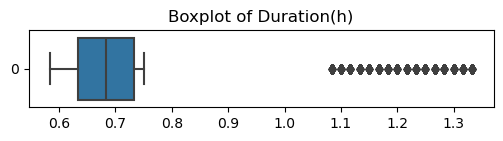

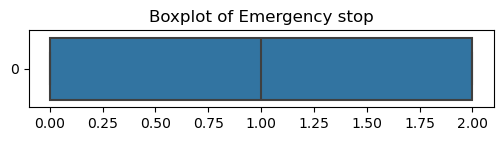

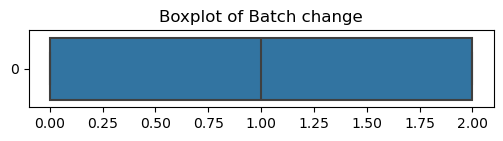

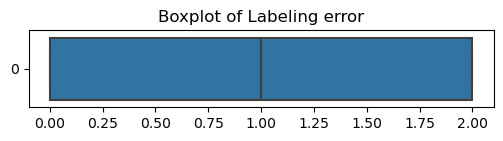

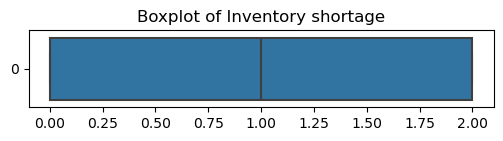

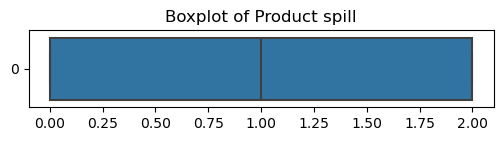

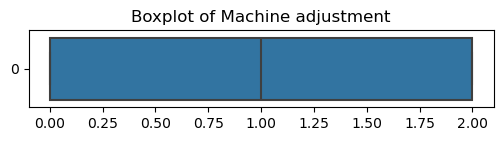

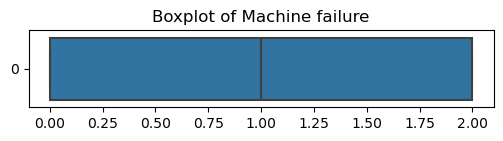

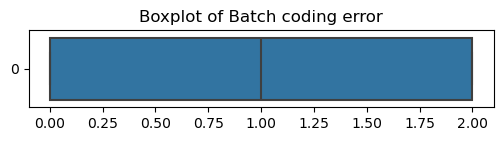

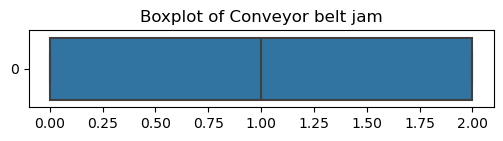

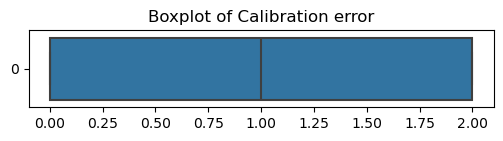

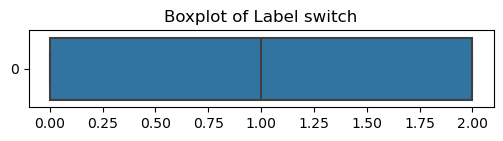

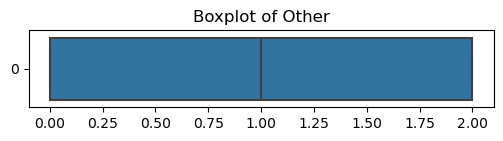

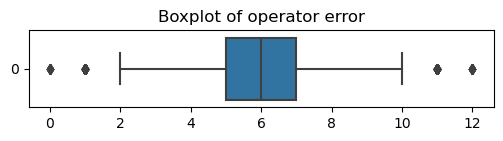

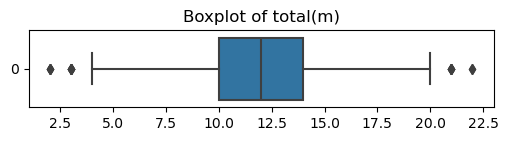

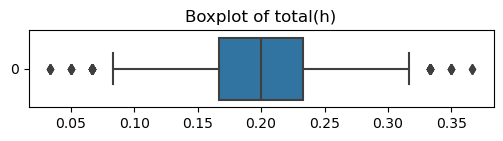

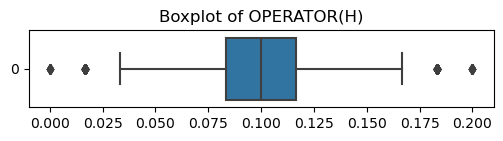

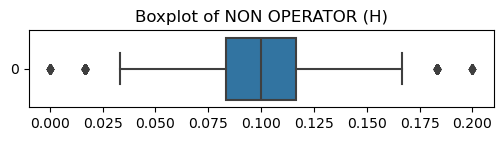

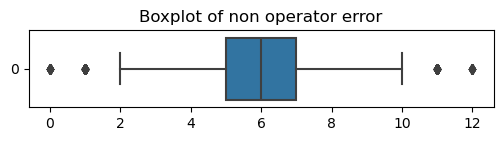

In [21]:


for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[col], orient='h')
    plt.title(f'Boxplot of {col}')
    plt.show()


### 1.3 correlation between columns

In [13]:
columns = [ 'OPERATOR(H)', 'NON OPERATOR (H)', 
           'Emergency stop', 'Machine failure', 'Batch change','Labeling error','Inventory shortage','Product spill','Machine adjustment','Batch coding error','Conveyor belt jam','Calibration error','Label switch','Other']

In [15]:
corr_subset = df[columns].corr()
corr_subset

,OPERATOR(H),NON OPERATOR (H),Emergency stop,Machine failure,Batch change,Labeling error,Inventory shortage,Product spill,Machine adjustment,Batch coding error,Conveyor belt jam,Calibration error,Label switch,Other
OPERATOR(H),1.000000,0.005750,0.006523,-0.000057,0.395532,0.001335,-0.014064,0.411715,0.402458,0.414041,-0.009604,0.412456,0.403407,0.030130
NON OPERATOR (H),0.005750,1.000000,0.407143,0.407806,0.000935,0.421062,0.401275,-0.004261,0.020540,0.015202,0.407895,-0.005147,-0.013481,0.402061
Emergency stop,0.006523,0.407143,1.000000,0.011000,-0.001887,0.004522,-0.011458,0.005517,0.014734,0.006089,-0.008797,-0.002199,-0.006456,-0.000521
Machine failure,-0.000057,0.407806,0.011000,1.000000,0.003298,0.006629,-0.013343,-0.000738,0.002544,0.015718,0.003444,-0.013723,-0.007403,-0.007571
Batch change,0.395532,0.000935,-0.001887,0.003298,1.000000,0.006777,-0.004994,-0.011707,-0.007567,-0.009835,-0.016243,0.010327,-0.015430,0.015472
Labeling error,0.001335,0.421062,0.004522,0.006629,0.006777,1.000000,0.019567,-0.004839,0.007291,0.004805,0.010239,-0.001743,-0.009136,-0.008830
Inventory shortage,-0.014064,0.401275,-0.011458,-0.013343,-0.004994,0.019567,1.000000,-0.010270,0.001976,-0.000605,-0.015155,-0.009485,-0.011027,-0.002068
Product spill,0.411715,-0.004261,0.005517,-0.000738,-0.011707,-0.004839,-0.010270,1.000000,-0.009369,0.009844,-0.007498,0.009865,0.007296,0.007470
Machine adjustment,0.402458,0.020540,0.014734,0.002544,-0.007567,0.007291,0.001976,-0.009369,1.000000,0.003430,0.004562,-0.003563,-0.004463,0.019213
Batch coding error,0.414041,0.015202,0.006089,0.015718,-0.009835,0.004805,-0.000605,0.009844,0.003430,1.000000,0.011798,-0.004496,0.005235,-0.000591


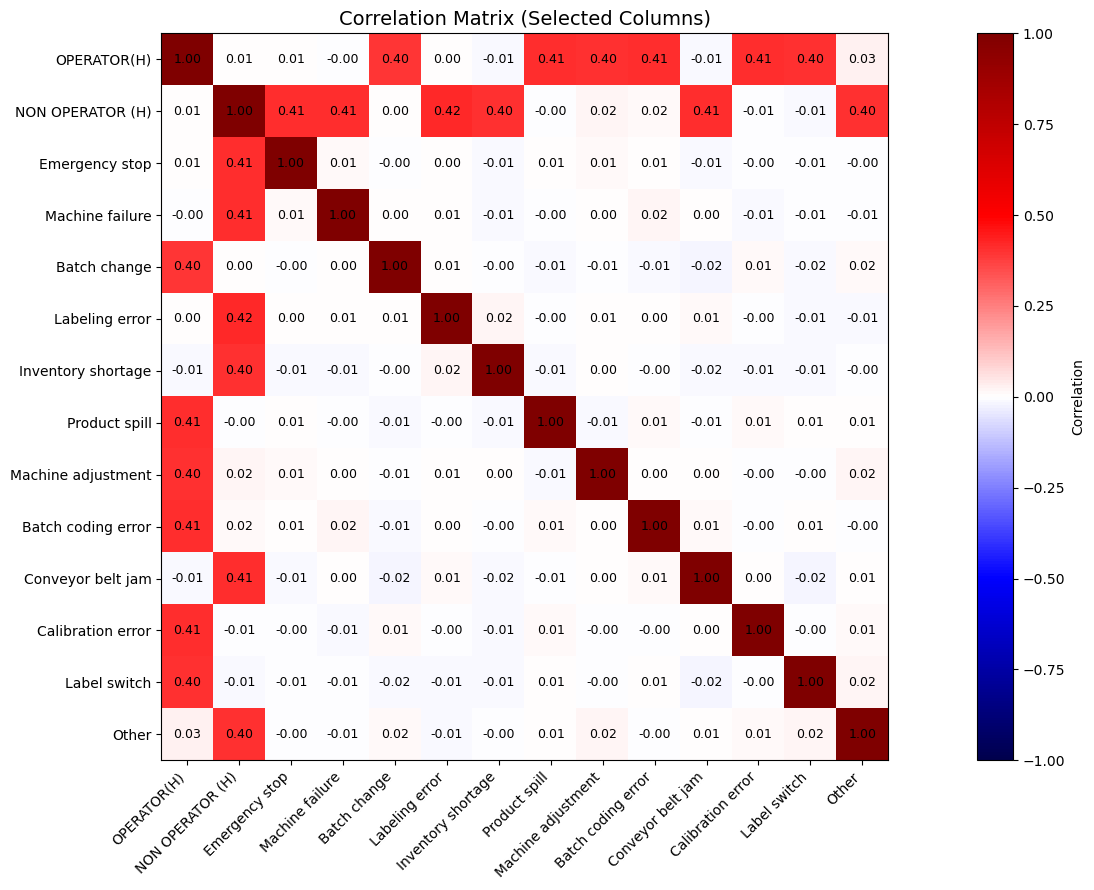

In [21]:

plt.figure(figsize=(18, 9))
im = plt.imshow(corr_subset, cmap='seismic', vmin=-1, vmax=1)
plt.colorbar(im, label='Correlation')

plt.xticks(range(len(columns)), columns, rotation=45, ha='right')
plt.yticks(range(len(columns)), columns)

for i in range(len(columns)):
    for j in range(len(columns)):
        value = corr_subset.iloc[i, j]
        plt.text(j, i, f'{value:.2f}', ha='center', va='center', color='black', fontsize=9)

plt.title('Correlation Matrix (Selected Columns)', fontsize=14)
plt.tight_layout()
plt.show()

## EDA

### monthly analysis 

Text(0.5, 1.0, 'Monthly Operator Errors')

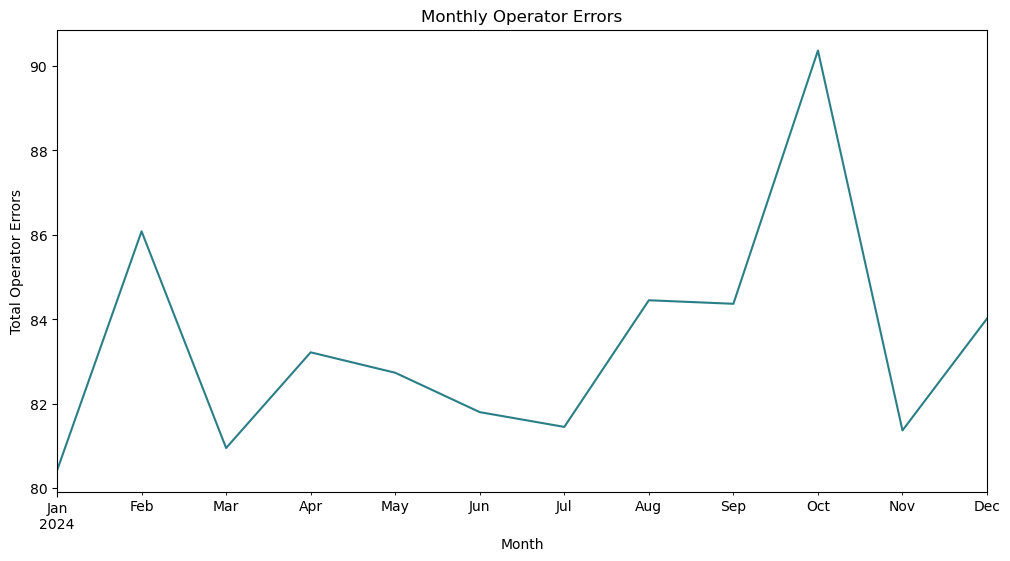

In [53]:
df['Month'] = df['Date'].dt.to_period('M')  
df2 = df.groupby('Month')['OPERATOR(H)'].sum()

plt.figure(figsize=(12, 6))
df2.plot(color='#2A7F86')
plt.xlabel("Month") 
plt.ylabel("Total Operator Errors")  
plt.title("Monthly Operator Errors")

Text(0.5, 1.0, 'Monthly non Operator Errors')

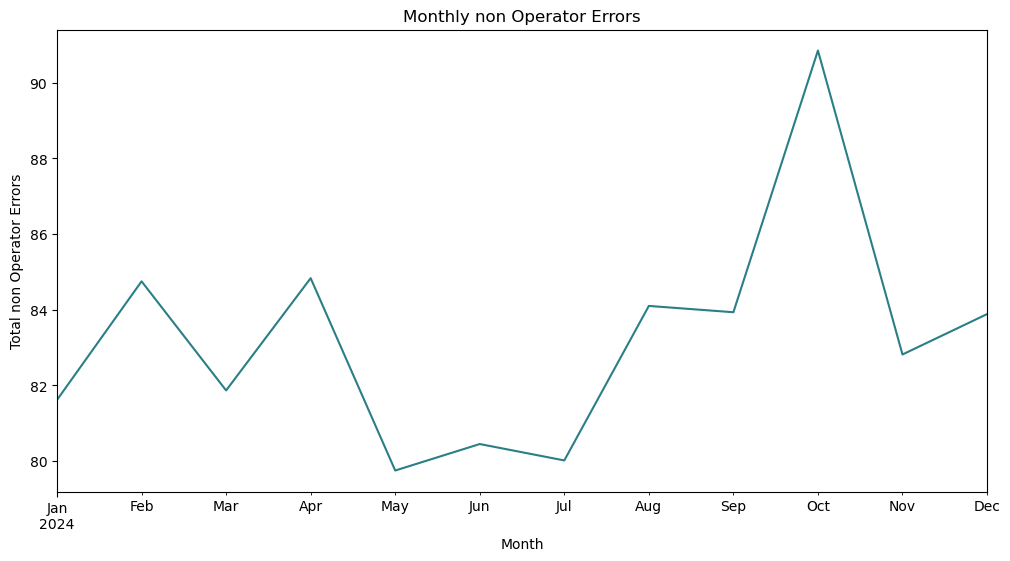

In [52]:
df['Month'] = df['Date'].dt.to_period('M')  
plt.figure(figsize=(12, 6))
df3 = df.groupby('Month')['NON OPERATOR (H)'].sum()
df3.plot(color='#2A7F86')
plt.xlabel("Month") 
plt.ylabel("Total non Operator Errors")  
plt.title("Monthly non Operator Errors")

Text(0.5, 1.0, 'total delay  ')

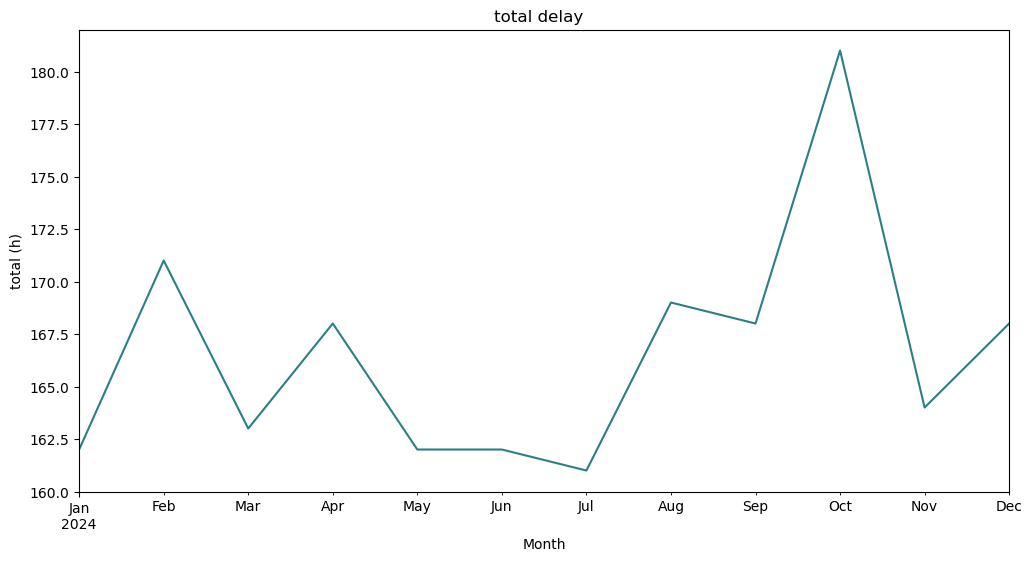

In [62]:
df['Month'] = df['Date'].dt.to_period('M')
plt.figure(figsize=(12, 6))
df3 = df.groupby('Month')['total(h)'].sum().round()
df3.plot(color='#2A7F86')
plt.xlabel("Month") 
plt.ylabel("total (h)")  
plt.title("total delay  ")

Text(0.5, 1.0, 'Batch per month ')

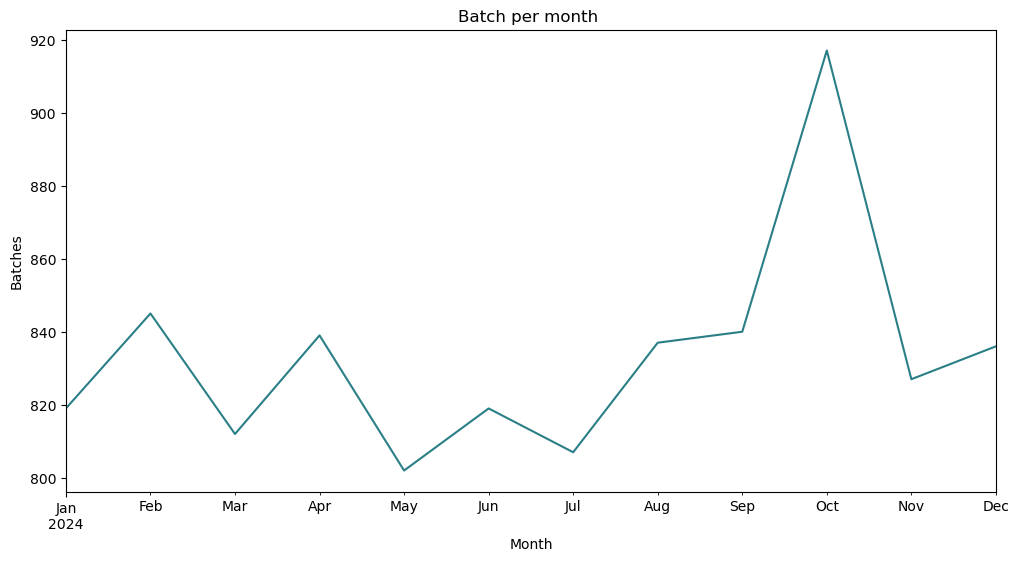

In [57]:
df['Month'] = df['Date'].dt.to_period('M')
plt.figure(figsize=(12, 6))
df3 = df.groupby('Month')['Batch'].count()
df3.plot(color='#2A7F86')
plt.xlabel("Month") 
plt.ylabel("Batches")  
plt.title("Batch per month ")

### shift 

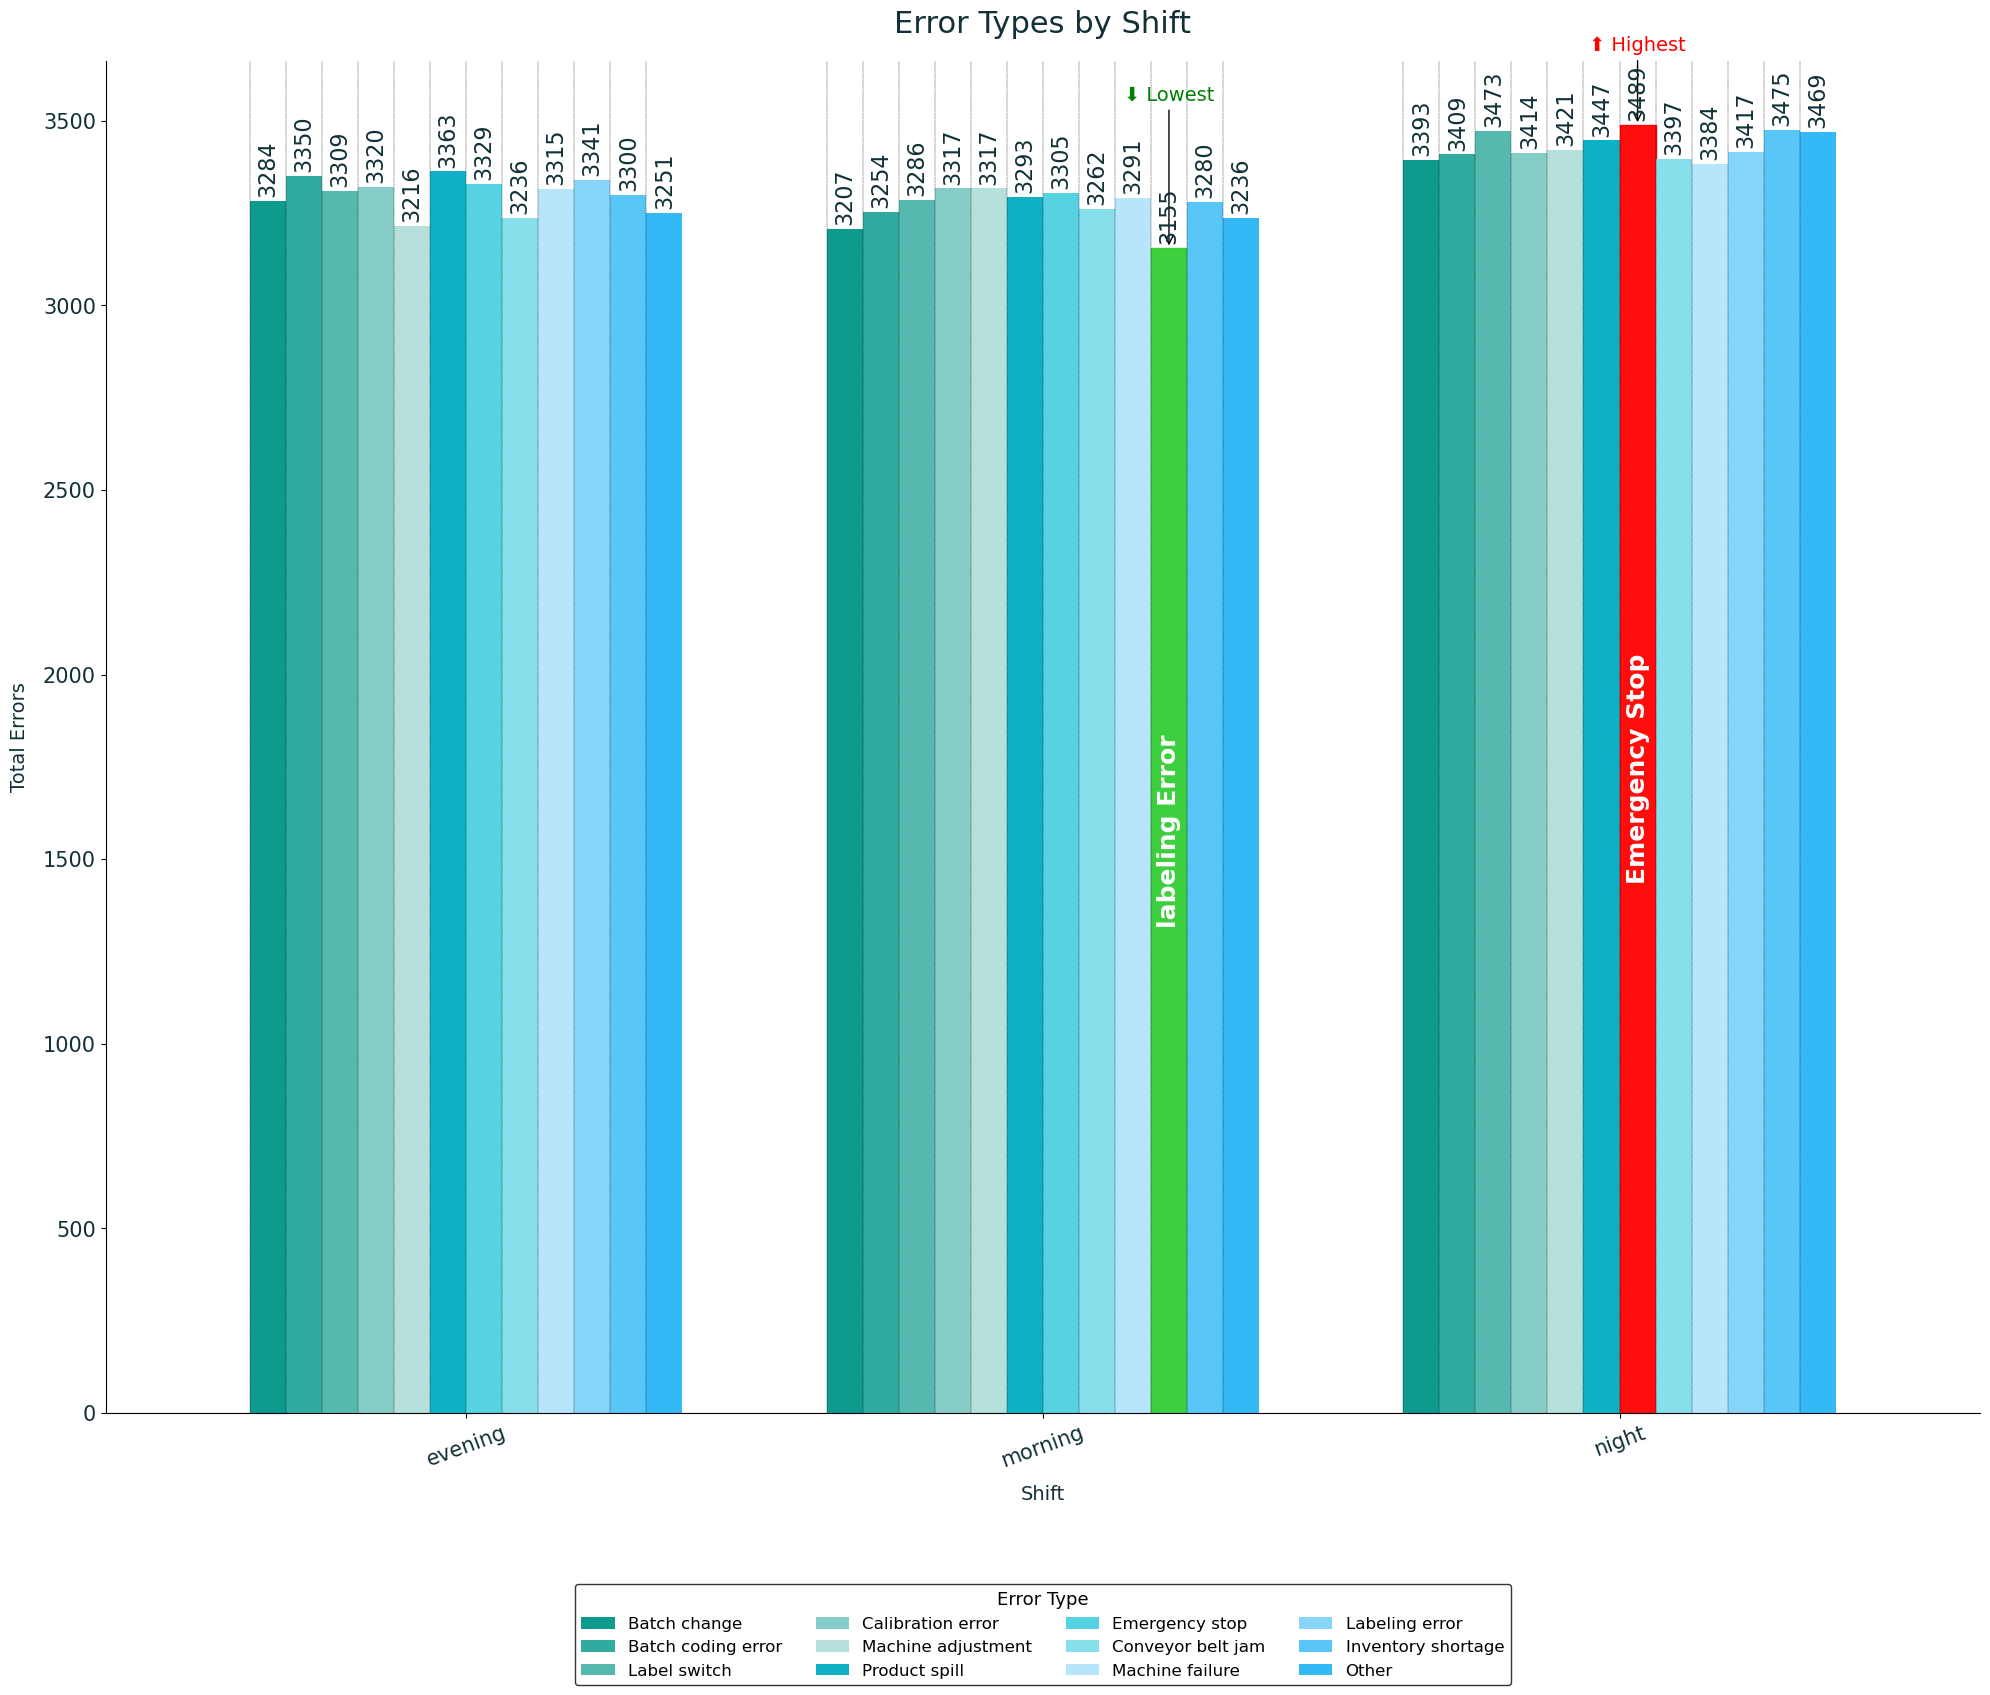

In [187]:
df22 = df.groupby('shift').agg({'Batch change': 'sum', 'Batch coding error': 'sum', 'Label switch':'sum', 'Calibration error':'sum' , 'Machine adjustment':'sum', 'Product spill':'sum','Emergency stop':'sum','Conveyor belt jam':'sum','Machine failure':'sum','Labeling error':'sum','Inventory shortage':'sum','Other':'sum'})

plt.clf()  
plt.close('all') 

custom_colors = [
    '#009688',  # Teal
    '#26A69A',  # Light Teal
    '#4DB6AC',  # Lighter Teal
    '#80CBC4',  # Mint Green
    '#B2DFDB',  # Pale Mint
    '#00ACC1',  # Cyan-like Teal
    '#4DD0E1',  # Light Cyan
    '#80DEEA',  # Soft Aqua
    '#B3E5FC',  # Pale Sky Blue
    '#81D4FA',  # Light Sky Blue
    '#4FC3F7',  # Sky Blue
    '#29B6F6'   # Bright Sky Blue
]
ax = df22.plot(kind='bar', figsize=(20, 17), color=custom_colors, width=0.75, alpha=0.95)

plt.title('Error Types by Shift',fontsize=22, color='#113037', pad=20)
plt.xlabel('Shift', fontsize=14, color='#113037', labelpad=10)
plt.ylabel('Total Errors', fontsize=14, color='#113037', labelpad=10)
plt.legend(
    title="Error Type", loc='upper center', bbox_to_anchor=(0.5, -0.12),
    ncol=4, facecolor='white', edgecolor='black',
    fontsize=12, title_fontsize=13
)
plt.xticks(rotation=20, color='#113037', fontsize=15)
plt.yticks(color='#113037', fontsize=15)

max_height = 0
min_height = float('inf')
max_x = min_x = 0

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > max_height:
            max_height = height
            max_x = bar.get_x() + bar.get_width() / 2
        if height < min_height:
            min_height = height
            min_x = bar.get_x() + bar.get_width() / 2

ax.annotate('⬆ Highest', xy=(max_x, max_height), xytext=(max_x, max_height + 200),
            ha='center', color='red', fontsize=14,
            arrowprops=dict( arrowstyle='->'))

ax.annotate('⬇ Lowest', xy=(min_x, min_height), xytext=(min_x, min_height + 400),
            ha='center', color='green', fontsize=14,
            arrowprops=dict(facecolor='green', arrowstyle='->'))

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=16, rotation=90, padding=3, color='#113037')

for bar in ax.patches:
    x = bar.get_x()
    ax.axvline(x=x, color='black', linestyle='--', linewidth=0.3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
bars = ax.patches

target_bar = bars[28]
x = target_bar.get_x() + target_bar.get_width() / 2
y = target_bar.get_height()
ax.text(x, y / 2, 'labeling Error',
        ha='center', va='center',
        fontsize=18, color='white', fontweight='bold',rotation=90)
bars[28].set_color('#32CD32')

target_bar = bars[20]
x = target_bar.get_x() + target_bar.get_width() / 2
y = target_bar.get_height()
ax.text(x, y / 2, 'Emergency Stop',
        ha='center', va='center',
        fontsize=18, color='white', fontweight='bold',rotation=90)

bars[20].set_color('#FF0000')
plt.tight_layout()
plt.show()


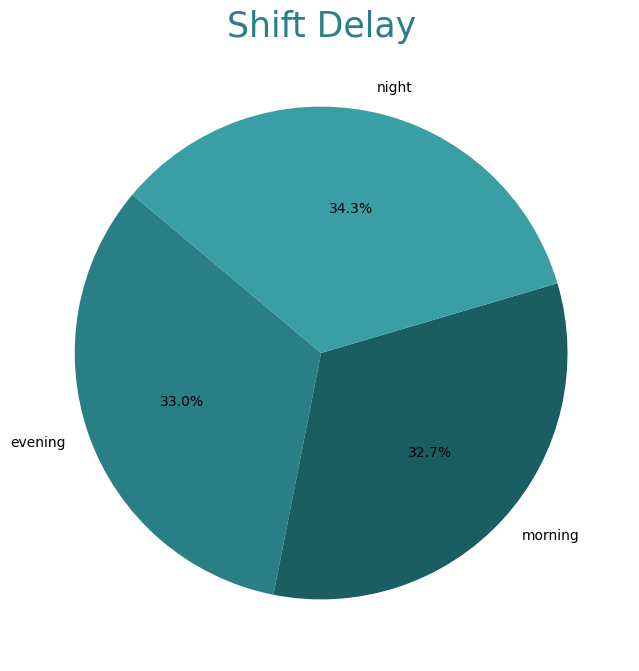

In [72]:
plt.close()
df0 = df.groupby('shift')['total(h)'].sum()

colors = ['#2A7F86', '#1B5E61', '#3A9FA5', '#70C6C6', '#A3E3E3']
plt.figure(figsize=(16, 8))
plt.pie(df0, labels=df0.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Shift Delay', color='#2A7F86', fontsize=25 )
plt.show()

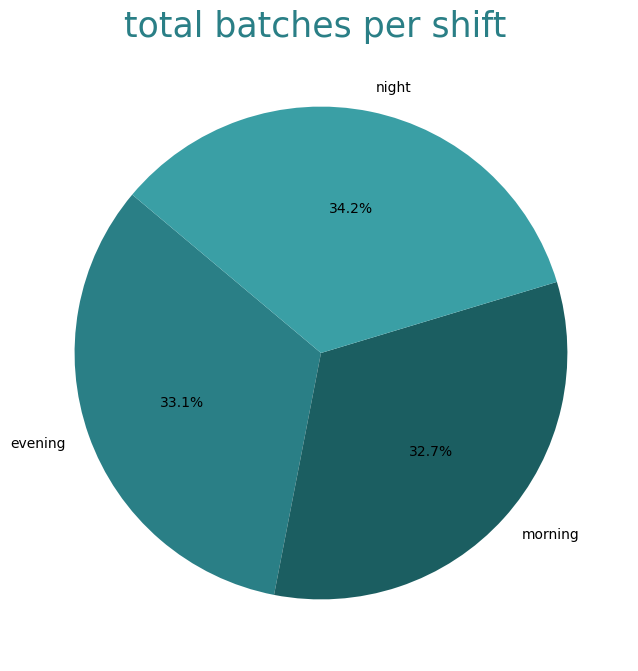

In [73]:
plt.close()

df5 = df.groupby('shift')['Batch'].count()
plt.figure(figsize=(16, 8))
colors = ['#2A7F86', '#1B5E61', '#3A9FA5', '#70C6C6', '#A3E3E3']
plt.pie(df5, labels=df5.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Shift Delay', color='#2A7F86')
plt.title('total batches per shift ', fontsize=25)
plt.show()

###  operator 


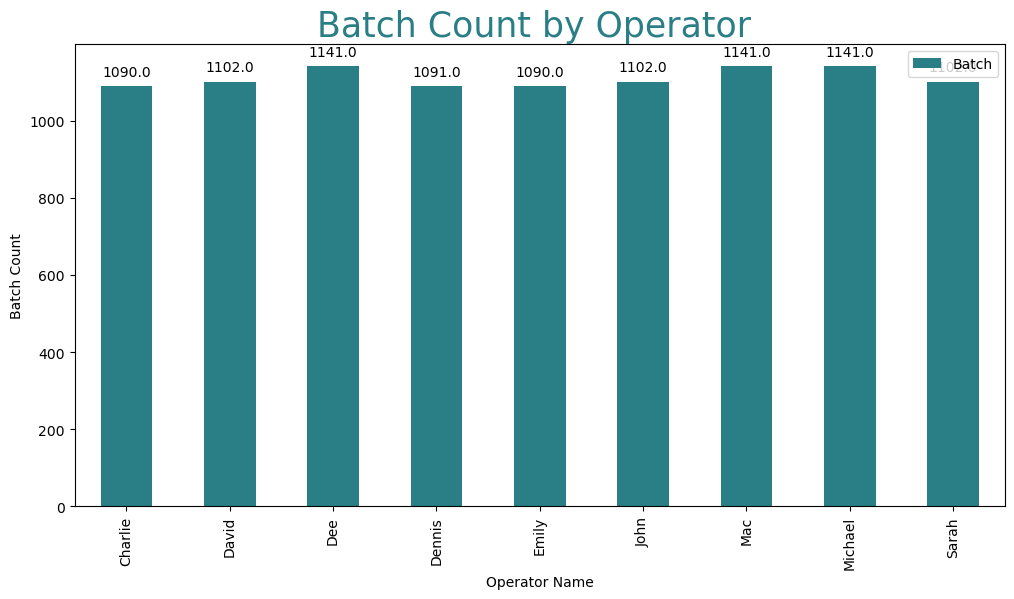

In [74]:
plt.close()

df7 = df.groupby(['operator']).agg({
    'Batch': 'count', 
}) 
ax = df7.plot(kind='bar', stacked=True,color='#2A7F86', figsize=(12, 6))
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                xytext=(0, 5),  
                textcoords='offset points',
                ha='center', va='bottom')


plt.title('Batch Count by Operator ', fontsize=25, color='#2A7F86')
plt.xlabel('Operator Name')

plt.ylabel('Batch Count')
plt.show()

Text(0, 0.5, 'Total hours')

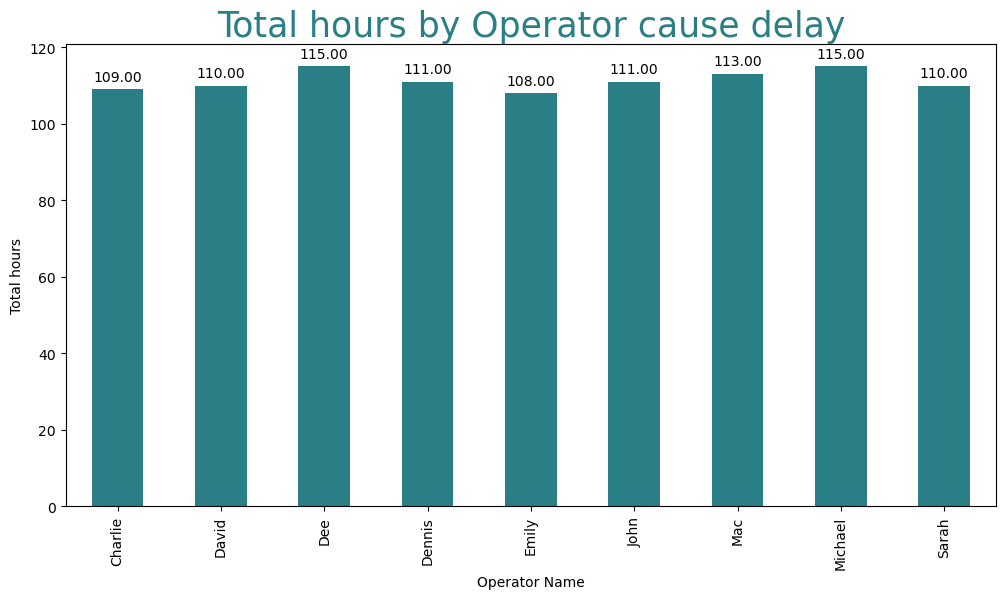

In [98]:
df8 = df.groupby('operator')['OPERATOR(H)'].sum().round(0)
ax = df8.plot(kind = 'bar',color='#2A7F86',figsize=(12, 6))

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                xytext=(0, 4), 
                textcoords='offset points',
                ha='center', va='bottom')
plt.title('Total hours by Operator cause delay', fontsize=25, color='#2A7F86')
plt.xlabel('Operator Name')
plt.ylabel('Total hours')    

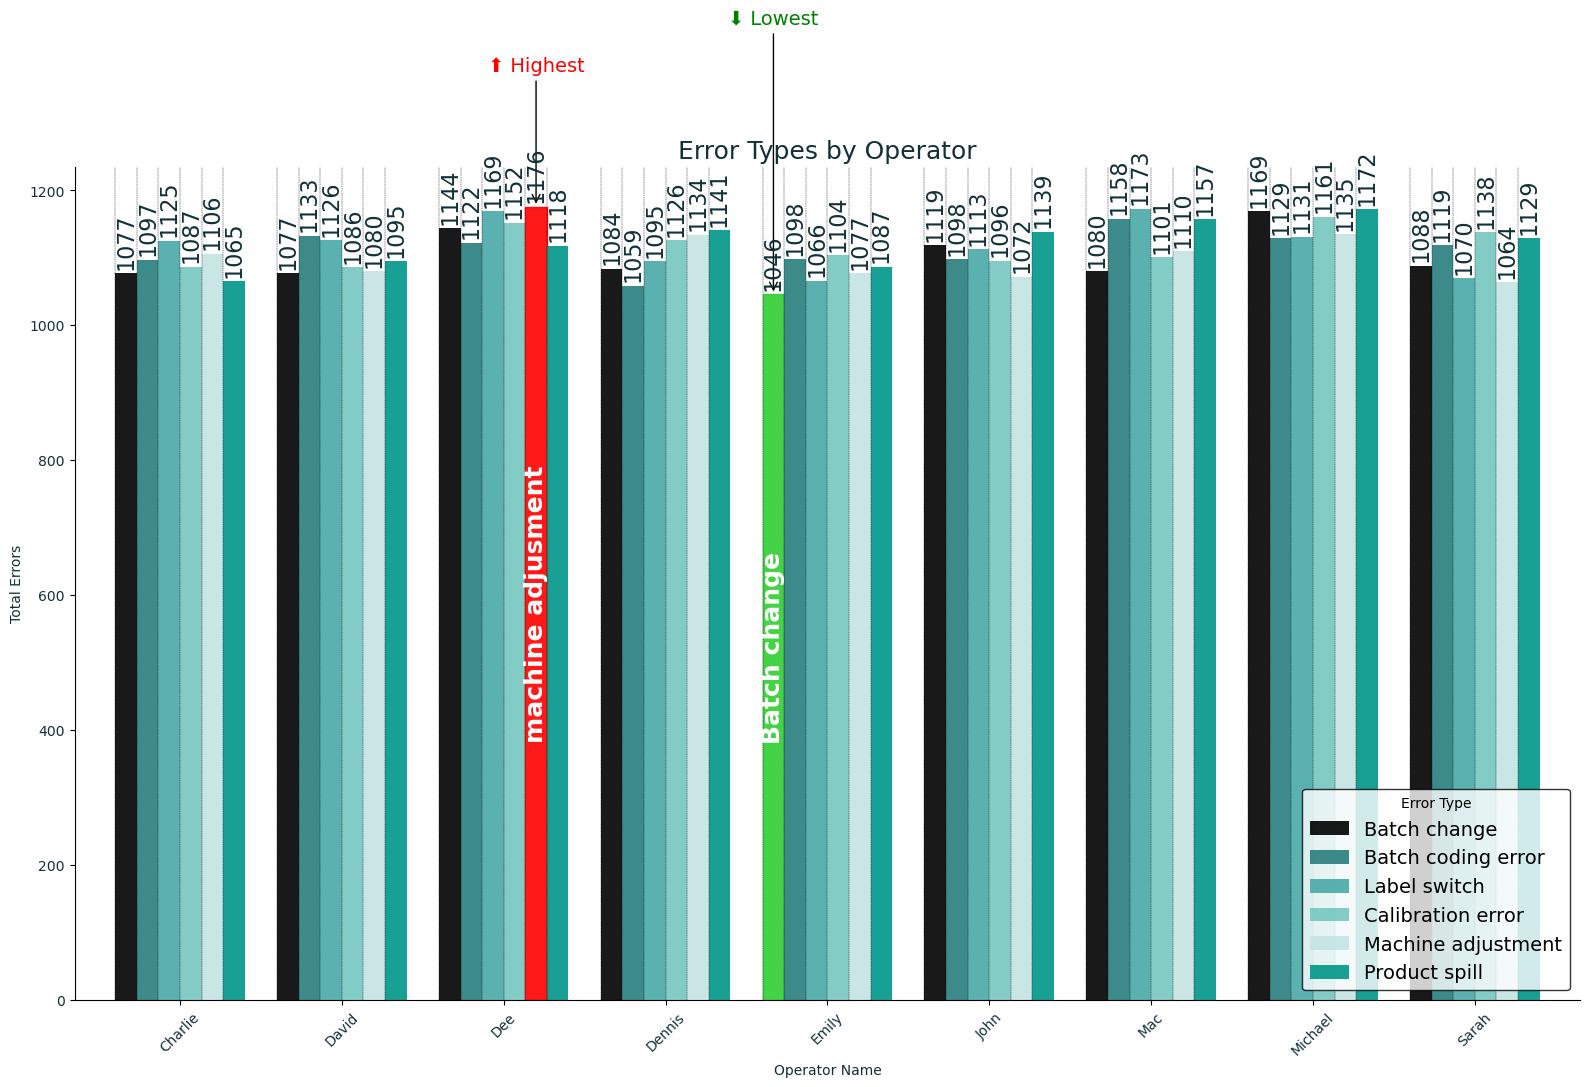

In [76]:
df22 = df.groupby('operator').agg({'Batch change': 'sum', 'Batch coding error': 'sum', 'Label switch':'sum', 'Calibration error':'sum' , 'Machine adjustment':'sum', 'Product spill':'sum'})

plt.clf()  
plt.close('all') 

custom_colors = [
    '#000000',  # Deep blue (أزرق غامق فيه عمق)
    '#287D7D',  # Teal متوسط (أخضر مزرق واضح)
    '#48A9A6',  # Turquoise soft (منعش ومريح للعين)
    '#76C7C0',  # Soft minty teal (أفتح بدرجة ملحوظة)
    '#C4E4E3' ,# Pale aqua (فاتح جدًا، شبه محايد)
        '#009688'
]
ax = df22.plot(kind='bar', figsize=(16, 11), color=custom_colors, width=0.8, alpha=0.9)
plt.title('Error Types by Operator', color='#113037',fontsize=18)
plt.xlabel('Operator Name', color='#113037')
plt.ylabel('Total Errors', color='#113037')
max_height = 0
min_height = float('inf')
max_x = min_x = 0

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > max_height:
            max_height = height
            max_x = bar.get_x() + bar.get_width() / 2
        if height < min_height:
            min_height = height
            min_x = bar.get_x() + bar.get_width() / 2

ax.annotate('⬆ Highest', xy=(max_x, max_height), xytext=(max_x, max_height + 200),
            ha='center', color='red', fontsize=14,
            arrowprops=dict( arrowstyle='->'))

ax.annotate('⬇ Lowest', xy=(min_x, min_height), xytext=(min_x, min_height + 400),
            ha='center', color='green', fontsize=14,
            arrowprops=dict(facecolor='red', arrowstyle='->'))
plt.legend(title="Error Type", loc='lower right', facecolor='white', edgecolor='black', fontsize=14)

plt.xticks(rotation=45, color='#113037')
plt.yticks(color='#113037')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=16, rotation=90, padding=3, color='#113037')

for bar in ax.patches:
    x = bar.get_x()
    ax.axvline(x=x, color='black', linestyle='--', linewidth=0.3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
bars = ax.patches

target_bar = bars[4]
x = target_bar.get_x() + target_bar.get_width() / 2
y = target_bar.get_height()
ax.text(x, y / 2, 'Batch change',
        ha='center', va='center',
        fontsize=18, color='white', fontweight='bold',rotation=90)
bars[4].set_color('#32CD32')

target_bar = bars[38]
x = target_bar.get_x() + target_bar.get_width() / 2
y = target_bar.get_height()
ax.text(x, y / 2, 'machine adjusment',
        ha='center', va='center',
        fontsize=18, color='white', fontweight='bold',rotation=90)

bars[38].set_color('#FF0000')
#32CD32
plt.tight_layout()
plt.show()


### product analysis 


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Cola'),
  Text(1, 0, 'Cola_2L'),
  Text(2, 0, 'Diet Cola '),
  Text(3, 0, 'Lemon Lime'),
  Text(4, 0, 'Orange'),
  Text(5, 0, 'Root Berry')])

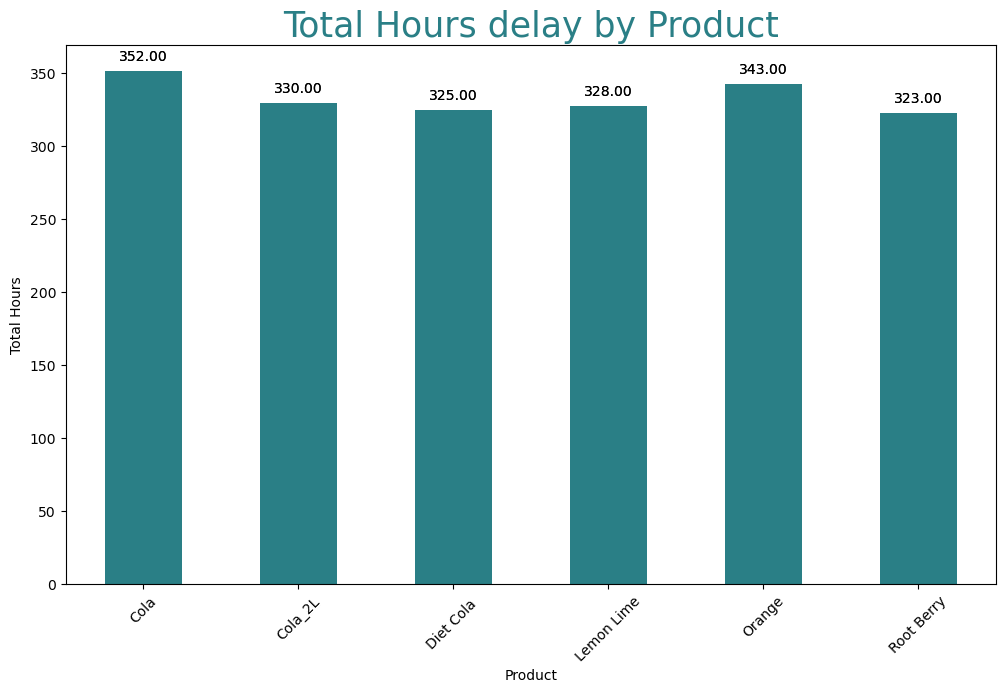

In [103]:
df66 = df.groupby('Product')['total(h)'].sum().round()
df66.plot(kind='bar')
ax = df66.plot(kind='bar', figsize=(12, 7),color='#2A7F86')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 5), 
                textcoords='offset points',
                ha='center', va='bottom')


plt.title('Total Hours delay by Product', fontsize=25, color='#2A7F86')
plt.xlabel('Product')
plt.ylabel('Total Hours')


plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Cola'),
  Text(1, 0, 'Cola_2L'),
  Text(2, 0, 'Diet Cola '),
  Text(3, 0, 'Lemon Lime'),
  Text(4, 0, 'Orange'),
  Text(5, 0, 'Root Berry')])

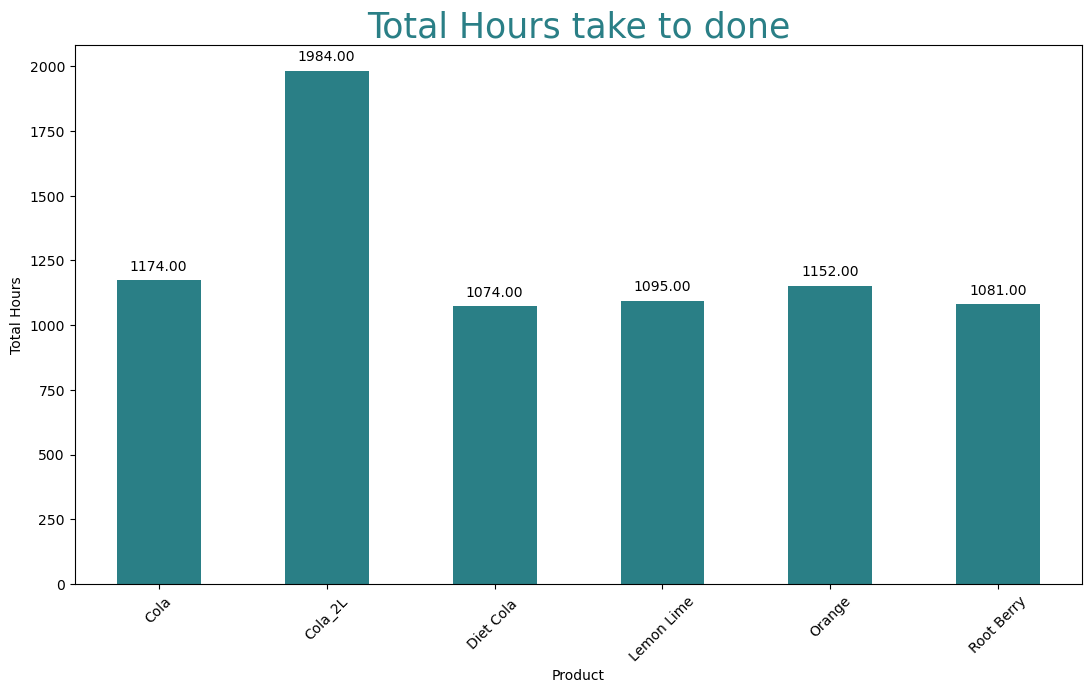

In [102]:
df66 = df.groupby('Product')['Duration(h)'].sum().round()

ax = df66.plot(kind='bar', figsize=(13, 7),color='#2A7F86')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 5), 
                textcoords='offset points',
                ha='center', va='bottom')

plt.title('Total Hours take to done', fontsize=25, color='#2A7F86')
plt.xlabel('Product')
plt.ylabel('Total Hours')


plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Cola'),
  Text(1, 0, 'Cola_2L'),
  Text(2, 0, 'Diet Cola '),
  Text(3, 0, 'Lemon Lime'),
  Text(4, 0, 'Orange'),
  Text(5, 0, 'Root Berry')])

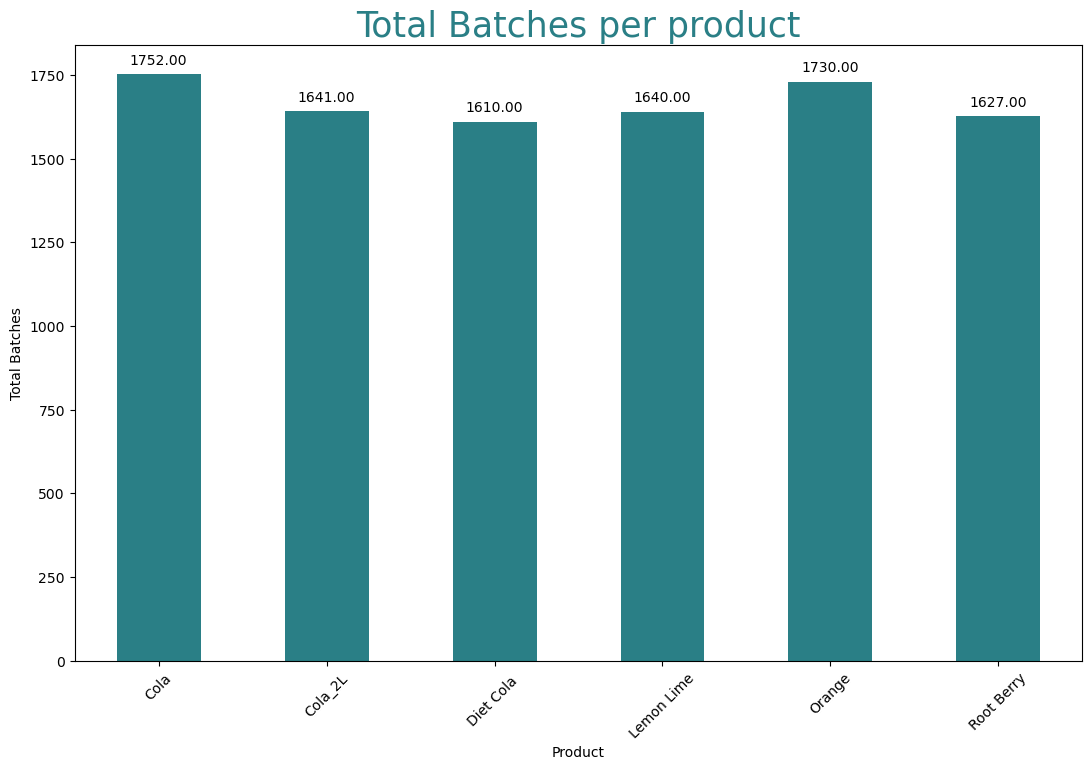

In [101]:
df66 = df.groupby('Product')['Batch'].count()
ax = df66.plot(kind='bar', figsize=(13, 8),color='#2A7F86')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 5), 
                textcoords='offset points',
                ha='center', va='bottom')

plt.title('Total Batches per product', fontsize=25, color='#2A7F86')
plt.xlabel('Product')
plt.ylabel('Total Batches')


plt.xticks(rotation=45)

Text(0, 0.5, 'operator error(h)')

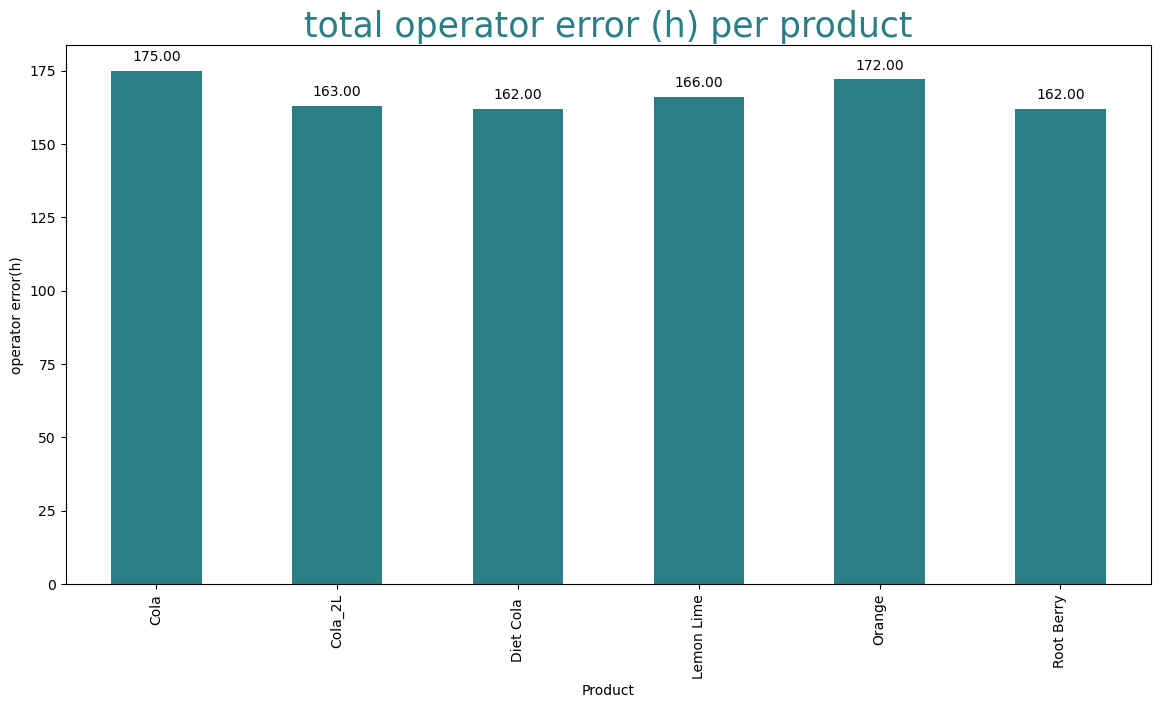

In [100]:
total_hours_per_shift = df.groupby(['Product', 'shift'])['total(h)'].sum()

df65 = df.groupby('Product')['OPERATOR(H)'].sum().round()
ax = df65.plot(kind='bar', figsize=(14, 7),color='#2A7F86')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 5), 
                textcoords='offset points',
                ha='center', va='bottom')

plt.title('total operator error (h) per product', fontsize=25, color='#2A7F86')
plt.xlabel('Product')
plt.ylabel('operator error(h)')


Text(0, 0.5, 'non operator error(h)')

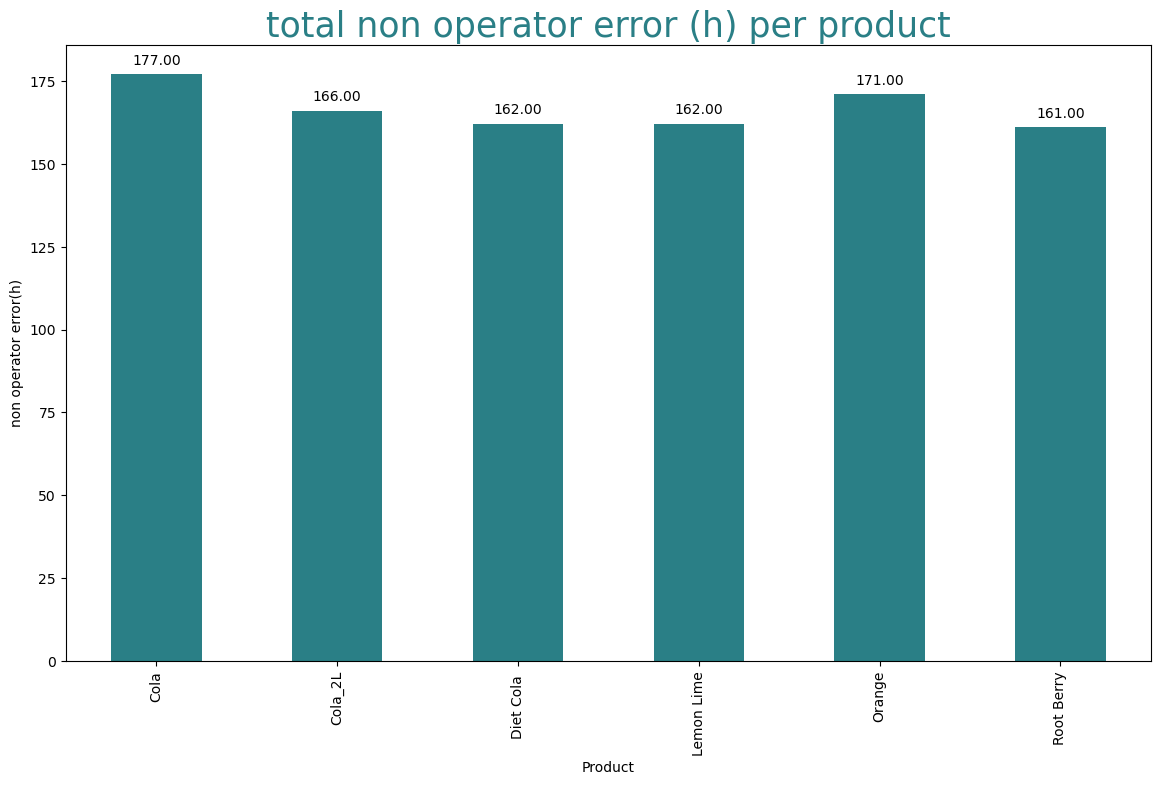

In [46]:
df64 = df.groupby('Product')['NON OPERATOR (H)'].sum().round()
ax = df64.plot(kind='bar', figsize=(14, 8),color='#2A7F86')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 5), 
                textcoords='offset points',
                ha='center', va='bottom')

plt.title('total non operator error (h) per product', fontsize=25, color='#2A7F86')
plt.xlabel('Product')
plt.ylabel('non operator error(h)')

### 🏭 Manufacturing Downtime Dashboard  
## *Real-time Production Monitoring System*  

---

<div style="background-color:#f5f5f5; padding:15px; border-radius:5px; border-left: 5px solid #2a3f5f;">
<h3 style="color:#2a3f5f; margin-top:0;">📊 Dashboard Overview</h3>
<p style="font-size:30px;">This interactive dashboard provides comprehensive visibility into manufacturing downtime events, helping identify patterns and optimize production efficiency.</p>
</div>

---

## 📌 Key Metrics Tracked:
<h3 style="font-size:20px; margin-bottom:20px;">🔧 <strong>Equipment Failures</strong></h3>
<h3 style="font-size:20px; margin-bottom:20px;">⏱️ <strong>Duration Analysis</strong></h3>
<h3 style="font-size:20px; margin-bottom:20px;">📅 <strong>Trends Over Time</strong></h3>
<h3 style="font-size:20px; margin-bottom:20px;">🏗️ <strong>Department Comparisons</strong></h3>

---

### 🛠️ Dashboard Features:
<div style="font-size:20px; line-height:1.6;">
```python
- Real-time data visualization
- Automated alerts for abnormal downtime
- Comparative analysis tools

In [97]:
app = dash.Dash(__name__)

In [99]:
fig_bar = px.bar(df, x='Product', y='Batch', title="batches by Product")

In [103]:
app.layout = html.Div([
    html.H1("Interactive Dashboard", style={'text-align': 'center'}),
    
    # الرسم البياني الأول: بار شارت
    html.Div([
        dcc.Graph(
            id='downtime-bar-chart',
            figure=fig_bar
        )
    ])
])


In [192]:
fig1 = px.bar(df, x='shift', y='total(h)', title="Downtime by Product", color_discrete_sequence=['#2A7F86', '#1B5E61', '#3A9FA5', '#70C6C6', '#A3E3E3'])


In [194]:
fig2 = px.pie(df, names='shift',values='Duration(h)', title="duration in each batch",  color_discrete_sequence=['#2A7F86', '#1B5E61', '#3A9FA5', '#70C6C6', '#A3E3E3'])


In [195]:
fig3 = px.bar(df, x='Product', y='total(h)', color='Product', title="Downtime by Product",color_discrete_sequence=['#2A7F86', '#1B5E61', '#3A9FA5', '#70C6C6', '#A3E3E3'])


In [200]:
df['month'] = df['Date'].dt.strftime('%B')  
fig4 = px.bar(
    df,
    x='month',
    y='total(h)',
    title="Downtime by Month",
    color_discrete_sequence=['#2A7F86', '#1B5E61', '#3A9FA5', '#70C6C6', '#A3E3E3']
)

In [175]:
fig5 = px.bar(df, x='Product', y='Duration(h)', color='Product', title="duaratin Per Product",color_discrete_sequence=['#2A7F86', '#1B5E61', '#3A9FA5', '#70C6C6', '#A3E3E3'])


In [188]:
fig6 = px.bar(df, x='operator', y='OPERATOR(H)', color='operator', title="delay Per operator",color_discrete_sequence = [
    '#1B5E61', 
    '#2A7F86', 
    '#3A9FA5',  
    '#4EB8BE', 
    '#70C6C6',  
    '#8DD5D5',  
    '#A3E3E3',  
    '#B8F0F0',  
    '#D1FFFF'   ])


In [203]:
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("Manufacturing Downtime Dashboard", 
            style={
                'textAlign': 'center', 
                'marginBottom': '20px',  # قللنا الهامش
                'color': '#2a3f5f',
                'fontFamily': 'Arial, sans-serif',
                'fontSize': '30px'  # تصغير حجم العنوان قليلاً
            }),
    
    # First row with 3 charts
    html.Div([
        html.Div([
            dcc.Graph(figure=fig1, style={'height': '300px'})  # تحديد ارتفاع المخطط
        ], style={
            'width': '32%', 
            'boxShadow': '0 4px 8px 0 rgba(0,0,0,0.2)', 
            'padding': '8px',  # قللنا الحشو
            'backgroundColor': '#ffffff'
        }),

        html.Div([
            dcc.Graph(figure=fig2, style={'height': '300px'})
        ], style={
            'width': '32%', 
            'boxShadow': '0 4px 8px 0 rgba(0,0,0,0.2)', 
            'padding': '8px',
            'backgroundColor': '#ffffff'
        }),

        html.Div([
            dcc.Graph(figure=fig3, style={'height': '300px'})
        ], style={
            'width': '32%', 
            'boxShadow': '0 4px 8px 0 rgba(0,0,0,0.2)', 
            'padding': '8px',
            'backgroundColor': '#ffffff'
        })
    ], style={
        'display': 'flex', 
        'justifyContent': 'space-between', 
        'marginBottom': '15px'  # قللنا الهامش
    }),

    # Second row with 3 charts
    html.Div([
        html.Div([
            dcc.Graph(figure=fig4, style={'height': '300px'})
        ], style={
            'width': '32%', 
            'boxShadow': '0 4px 8px 0 rgba(0,0,0,0.2)', 
            'padding': '8px',
            'backgroundColor': '#ffffff'
        }),

        html.Div([
            dcc.Graph(figure=fig5, style={'height': '300px'})
        ], style={
            'width': '32%', 
            'boxShadow': '0 4px 8px 0 rgba(0,0,0,0.2)', 
            'padding': '8px',
            'backgroundColor': '#ffffff'
        }),

        html.Div([
            dcc.Graph(figure=fig6, style={'height': '300px'})
        ], style={
            'width': '32%', 
            'boxShadow': '0 4px 8px 0 rgba(0,0,0,0.2)', 
            'padding': '8px',
            'backgroundColor': '#ffffff'
        })
    ], style={
        'display': 'flex', 
        'justifyContent': 'space-between',
        'marginBottom': '15px'
    })
], style={'padding': '10px'})  # إضافة حشو عام للصفحة

app.run(mode='inline', debug=True)